In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series

import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

import statsmodels.api as sm


/Users/dorkyegg/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


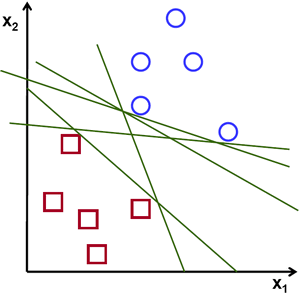

In [3]:
from IPython.display import Image
url = 'https://docs.opencv.org/3.4/separating-lines.png'
Image(url)

## question - what is the optimal line?  the one with max margin between 2 data classes

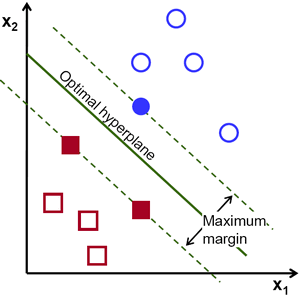

In [6]:
url = 'https://docs.opencv.org/2.4/_images/optimal-hyperplane.png'
Image(url)

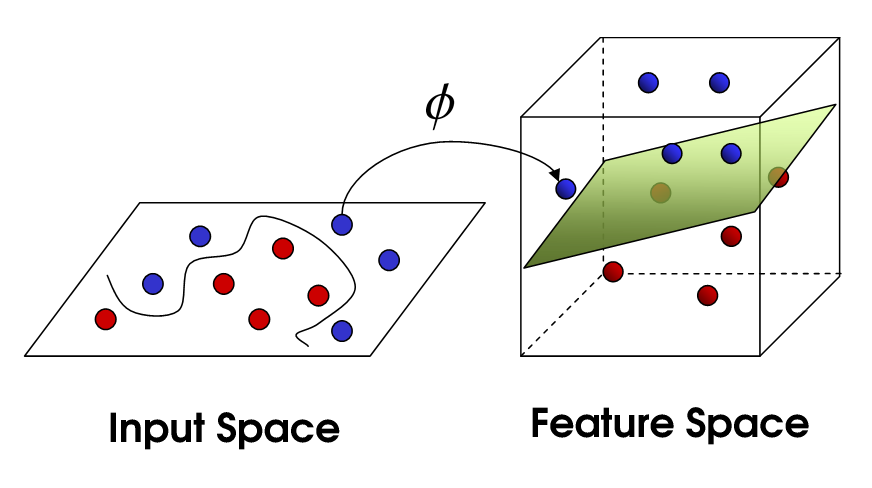

In [7]:
url = 'http://i.imgur.com/WuxyO.png'
Image(url)

In [11]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
Y = iris.target

In [12]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [29]:
# import all svm and explicitly SVC
from sklearn import svm
from sklearn.svm import SVC

In [14]:
# similar start with creating a model object then training/testing X and Y
model = SVC()

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)
model.fit(X_train,Y_train)
predicted = model.predict(X_test)
metrics.accuracy_score(predicted,Y_test)
# observation - whoa 100%? is that right?  
# if unsure, rerun train_test_split onward - rerunning ranges from 94%-100%

0.97368421052631582

In [30]:
# select only the first 2 features
X = iris.data[:,:2]
Y = iris.target

# regularization parameter
C = 1.0

In [ ]:
# let's create 4 different models and fit them

In [32]:
svc = svm.SVC(kernel='linear',C=C).fit(X,Y)

In [34]:
#gaussian radian basis function
rbf_svc = svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(X,Y)

In [35]:
# polynomial fix function
poly_svc = svm.SVC(kernel='poly',degree=3,C=C).fit(X,Y)

In [36]:
# linear fix function
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

In [37]:
# lets plot them out

# step size for my grid
h = 0.02

# setup x and y min/max range
x_min = X[:,0].min()-1
x_max = X[:,0].max()+1

y_min = X[:,1].min()-1
y_max = X[:,1].max()+1

In [38]:
# numpy can help create a meshgrid

xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [41]:
# titles for my meshplots, to be used in for loop
titles = ['SVC with linear kernel',
         'LinearSVC (linear kernel)',
         'SVC with RBF kernel',
         'SVC with poly (deg 3) kernel']

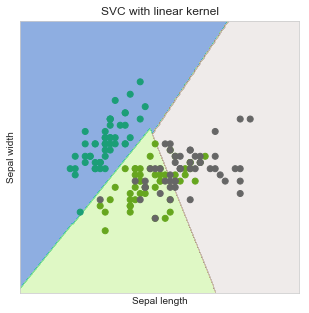

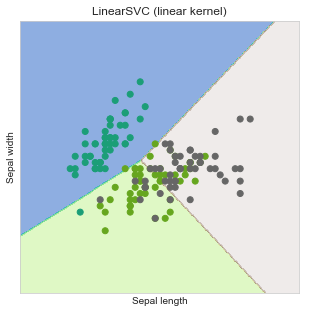

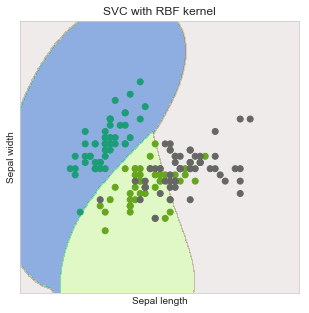

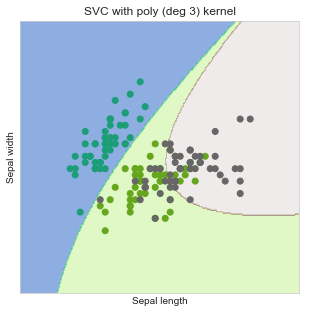

In [43]:
# loop through values in tuple

for i,clf in enumerate((svc,lin_svc,rbf_svc,poly_svc)):
    plt.figure(figsize=(12,12))
    plt.subplot(2,2,i+1)
    
    # spacing between 4 plots
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    
    # value for my prediction
    # need to pass values in the right structure, hence using ravel
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5)
    
    # also show training points themselves
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Dark2)
    
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])